In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [23]:
df = pd.read_csv('data_infonieve.csv')

In [24]:
df.name[df.forfait == df.forfait.min()].values[0]

'Bourg d´Oueil'

In [25]:
# df[df.min]

df.loc[df['forfait'].idxmin()]


id                             4322
name                  Bourg d´Oueil
downhill_skiing                   1
nordic_skiing                     0
status_id                         2
lifts_total                       3
runs_total                        7
km_total                          5
green_runs_total                  1
blue_runs_total                   3
red_runs_total                    2
black_runs_total                  1
special_runs                      0
snowpark                          0
special_runs_total                0
trineos                           0
esqui_de_fondo                    0
raquetas                          0
forfait                        12.0
Name: 51, dtype: object

In [26]:
df

,id,name,downhill_skiing,nordic_skiing,status_id,lifts_total,runs_total,km_total,green_runs_total,blue_runs_total,red_runs_total,black_runs_total,special_runs,snowpark,special_runs_total,trineos,esqui_de_fondo,raquetas,forfait
0,22001,Alp 2500,1,0,1,33,138,145,29,49,44,16,0,0,0,0,0,0,53.0
1,20,La Molina,1,0,1,16,66,71,20,18,22,6,0,1,0,1,0,1,49.0
2,19,Masella,1,0,1,17,72,74,9,31,22,10,0,0,0,0,0,0,52.0
3,16,Baqueira Beret,1,0,1,36,116,170,5,43,48,17,1,1,3,0,1,0,66.0
4,17,Boí Taüll,1,0,1,10,43,46,6,6,15,16,0,1,0,1,0,0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1527,Formiguères,1,0,1,7,21,25,4,6,9,2,0,0,0,0,0,0,37.0
64,1529,La Quillane,1,0,2,4,5,2,4,1,0,0,0,0,0,0,0,0,23.5
65,237,Les Angles,1,0,1,23,45,55,14,9,14,8,0,1,0,1,1,0,45.0
66,1530,Porté-Puymorens,1,0,1,10,33,50,12,6,7,8,0,0,0,0,0,0,37.0


In [27]:
df[df.name == 'Astún']

,id,name,downhill_skiing,nordic_skiing,status_id,lifts_total,runs_total,km_total,green_runs_total,blue_runs_total,red_runs_total,black_runs_total,special_runs,snowpark,special_runs_total,trineos,esqui_de_fondo,raquetas,forfait
12,7,Astún,1,0,1,15,61,50,5,18,22,6,1,1,10,1,0,0,54.0


In [30]:
df.name == 'Astún' [df.green_runs_total].plot.pie()

TypeError: string indices must be integers, not 'Series'

In [43]:
df.groupby(df.name == 'Astún')[['green_runs_total', 'blue_runs_total', 'red_runs_total', 'black_runs_total']].sum()

,green_runs_total,blue_runs_total,red_runs_total,black_runs_total
name,,,,
False,455,827,848,364
True,5,18,22,6


In [50]:
def main(name):
    
    # Agrupar por estación y sumar los totales de pistas de cada tipo
    grouped_df = df.groupby(df.name == 'name')[['green_runs_total', 'blue_runs_total', 'red_runs_total', 'black_runs_total']].sum()
    
    # Calcular el total de pistas por estación
    grouped_df['total'] = grouped_df.sum(axis=1)
    
    # Calcular el porcentaje de cada tipo de pista
    for col in ['green_runs_total', 'blue_runs_total', 'red_runs_total', 'black_runs_total']:
        grouped_df[col + '_percentage'] = (grouped_df[col] / grouped_df['total']) * 100
    
    # Seleccionar solo las columnas de porcentaje
    percentages_df = grouped_df[['green_runs_total_percentage', 'blue_runs_total_percentage', 
                                 'red_runs_total_percentage', 'black_runs_total_percentage']]
    
    # Renombrar las columnas para mejor visualización
    percentages_df.columns = ['Verde', 'Azul', 'Roja', 'Negra']
    
    # Plotear los porcentajes
    fig, ax = plt.subplots()
    ax.pie(percentages_df.iloc[0], labels=percentages_df.columns, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

In [63]:
main('Boí Taull')

TypeError: main() takes 0 positional arguments but 1 was given

In [67]:
def porcentaje_pistas_por_estacion(nombre_estacion):
    # Filtrar el DataFrame por el nombre de la estación
    estacion_df = df[df['name'] == nombre_estacion]
    
    # Calcular el total de pistas
    total_pistas = estacion_df['green_runs_total'].iloc[0] + estacion_df['blue_runs_total'].iloc[0] + estacion_df['red_runs_total'].iloc[0] + estacion_df['black_runs_total'].iloc[0]
    
    # Calcular el porcentaje de cada tipo de pista
    verde = estacion_df['green_runs_total'].iloc[0] / total_pistas * 100
    azul = estacion_df['blue_runs_total'].iloc[0] / total_pistas * 100
    roja = estacion_df['red_runs_total'].iloc[0] / total_pistas * 100
    negra = estacion_df['black_runs_total'].iloc[0] / total_pistas * 100
    
    fig, ax = plt.subplots()
    ax.pie([verde, azul, roja, negra], labels=['Verde', 'Azul', 'Roja', 'Negra'], autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    
    return verde, azul, roja, negra



(13.953488372093023, 13.953488372093023, 34.883720930232556, 37.2093023255814)

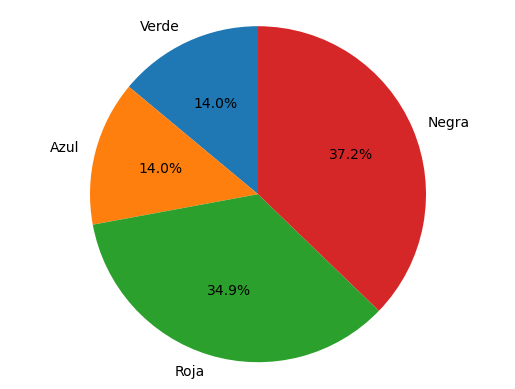

In [68]:
porcentaje_pistas_por_estacion('Boí Taüll')


In [73]:
df = df.drop('id', axis=1)

In [74]:
df

,name,downhill_skiing,nordic_skiing,status_id,lifts_total,runs_total,km_total,green_runs_total,blue_runs_total,red_runs_total,black_runs_total,special_runs,snowpark,special_runs_total,trineos,esqui_de_fondo,raquetas,forfait
0,Alp 2500,1,0,1,33,138,145,29,49,44,16,0,0,0,0,0,0,53.0
1,La Molina,1,0,1,16,66,71,20,18,22,6,0,1,0,1,0,1,49.0
2,Masella,1,0,1,17,72,74,9,31,22,10,0,0,0,0,0,0,52.0
3,Baqueira Beret,1,0,1,36,116,170,5,43,48,17,1,1,3,0,1,0,66.0
4,Boí Taüll,1,0,1,10,43,46,6,6,15,16,0,1,0,1,0,0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Formiguères,1,0,1,7,21,25,4,6,9,2,0,0,0,0,0,0,37.0
64,La Quillane,1,0,2,4,5,2,4,1,0,0,0,0,0,0,0,0,23.5
65,Les Angles,1,0,1,23,45,55,14,9,14,8,0,1,0,1,1,0,45.0
66,Porté-Puymorens,1,0,1,10,33,50,12,6,7,8,0,0,0,0,0,0,37.0
